Data Analysis Project!

 About/TIME-WASTERS ON SOCIAL MEDIA

  ➡️ Frist Step:  Data Cleaning

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df= pd.read_excel(r"C:\Users\ayafo\Downloads\TIME-WASTERS ON SOCIAL MEDIA (1) (1).xlsx")
df.head(30)


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Productivity,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,21:00:00,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,17:00:00,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,14:00:00,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,21:00:00,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,08:00:00,10,0,At home,Mobile Data
5,6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,...,3,7,Entertainment,Computer,Android,21:00:00,5,5,At home,Wi-Fi
6,7,56,Male,India,46201,False,False,Students,Rural,TikTok,...,8,2,Habit,Smartphone,Android,08:00:00,10,0,At school,Wi-Fi
7,8,36,Male,Barzil,39715,False,False,Engineer,Rural,Instagram,...,3,7,Entertainment,Tablet,Android,21:00:00,5,5,At home,Mobile Data
8,9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,...,3,7,Entertainment,Computer,Android,21:00:00,5,5,At home,Mobile Data
9,10,28,Other,United States,35078,False,False,Students,Rural,YouTube,...,6,4,Boredom,Smartphone,iOS,14:00:00,8,2,At home,Mobile Data


In [7]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

print("\nDescriptive Statistics:\n", df.describe())

print("\nMissing Values:\n", df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())

Shape: (1000, 31)

Data Types:
 UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64
Debt                          bool
Owns Property                 bool
Profession                  object
Demographics                object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video ID                     int64
Video Category              object
Video Length                 int64
Engagement                   int64
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   object
Productivity                 int64
Satisfaction                 int64
Watch Reason                object
DeviceType                  object
OS                          object
Watch Time                  object
Self Control           

In [8]:
df.drop_duplicates(inplace=True)

df.fillna({
    "Age": df["Age"].median(),
    "Income": df["Income"].median(),
    "Debt": False,
    "Owns Property": False,
}, inplace=True)

In [9]:
df["Location"] = df["Location"].replace({"Barzil": "Brazil"})

In [10]:
df["Watch Time"] = pd.to_datetime(df["Watch Time"], format="%H:%M:%S").dt.time

In [11]:
for col in ["Gender", "Location", "Platform", "DeviceType", "OS", "Watch Reason", "CurrentActivity", "ConnectionType"]:
    print(f"\nUnique values in {col}:\n", df[col].unique())


Unique values in Gender:
 ['Male' 'Female' 'Other']

Unique values in Location:
 ['Pakistan' 'Mexico' 'United States' 'Brazil' 'Vietnam' 'India'
 'Indonesia' 'Philippines' 'Japan' 'Germany']

Unique values in Platform:
 ['Instagram' 'Facebook' 'YouTube' 'TikTok']

Unique values in DeviceType:
 ['Smartphone' 'Computer' 'Tablet']

Unique values in OS:
 ['Android' 'iOS' 'MacOS' 'Windows']

Unique values in Watch Reason:
 ['Procrastination' 'Habit' 'Entertainment' 'Boredom']

Unique values in CurrentActivity:
 ['Commuting' 'At school' 'At home' 'At work']

Unique values in ConnectionType:
 ['Mobile Data' 'Wi-Fi']


In [12]:
import numpy as np
num_other =df[df['Gender'] == "Other"].shape[0]
half = num_other // 2
other_indices = df[df['Gender'] == "Other"].index.tolist()
np.random.shuffle(other_indices)

df.loc[other_indices[:half], 'Gender'] ="Male"
df.loc[other_indices[half:], 'Gender'] ="Female"
df.to_excel(r"C:\Users\ayafo\Downloads\Cleaned_Data1.xlsx", index=False)

In [13]:
df["Gender"] = df["Gender"].replace({"M": "Male", "F": "Female"})

In [14]:
df["Debt"] = df["Debt"].astype(bool)
df["Owns Property"] = df["Owns Property"].astype(bool)

In [15]:
df.reset_index(drop=True, inplace=True)

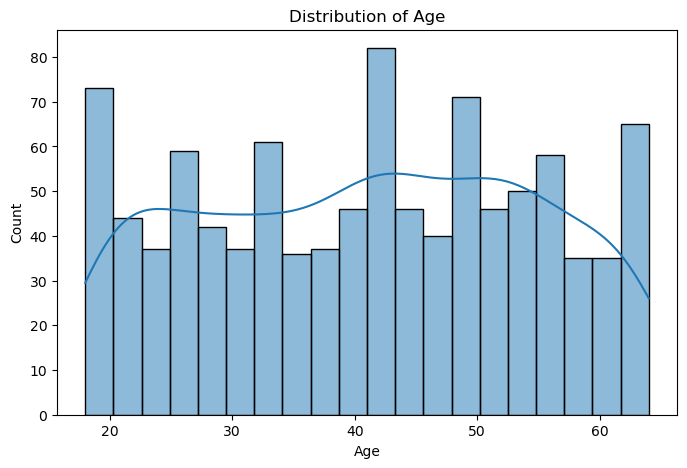

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\ayafo\AppData\Local\Temp\ipykernel_36364\3953408463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="coolwarm")


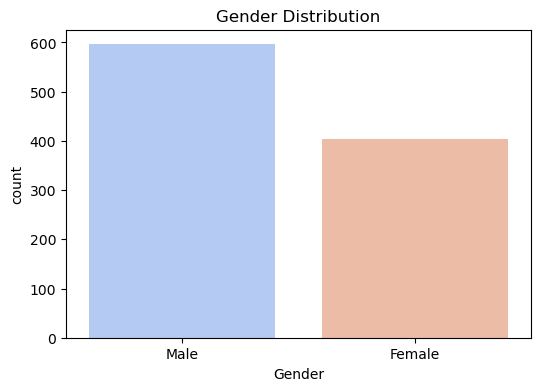

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

In [18]:
df['Gender'].value_counts()

Gender
Male      596
Female    404
Name: count, dtype: int64

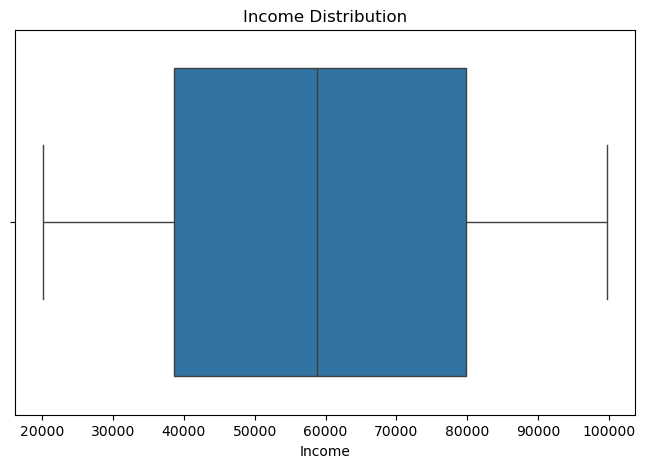

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Income"])
plt.title("Income Distribution")
plt.show()

C:\Users\ayafo\AppData\Local\Temp\ipykernel_36364\1440536670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Platform", data=df, order=df["Platform"].value_counts().index, palette="viridis")


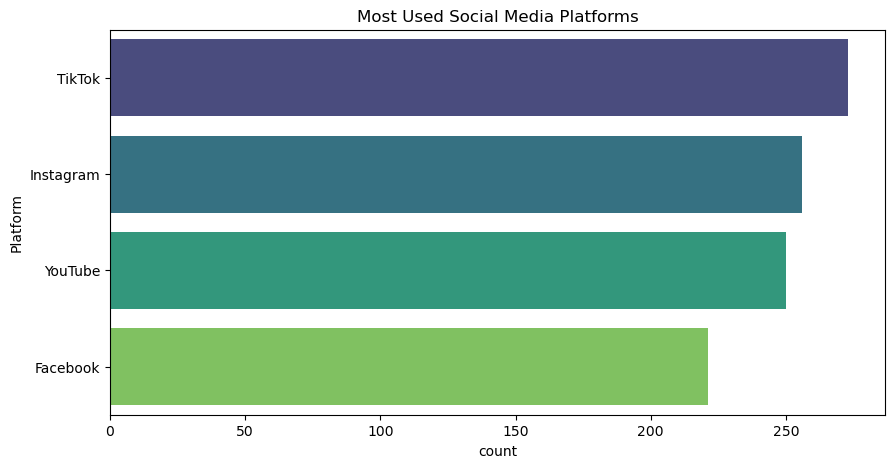

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y="Platform", data=df, order=df["Platform"].value_counts().index, palette="viridis")
plt.title("Most Used Social Media Platforms")
plt.show()

In [21]:
print("cleaned_Data")
df.head(30)



cleaned_Data


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Productivity,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,21:00:00,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,17:00:00,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,14:00:00,8,2,At home,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,21:00:00,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,08:00:00,10,0,At home,Mobile Data
5,6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,...,3,7,Entertainment,Computer,Android,21:00:00,5,5,At home,Wi-Fi
6,7,56,Male,India,46201,False,False,Students,Rural,TikTok,...,8,2,Habit,Smartphone,Android,08:00:00,10,0,At school,Wi-Fi
7,8,36,Male,Brazil,39715,False,False,Engineer,Rural,Instagram,...,3,7,Entertainment,Tablet,Android,21:00:00,5,5,At home,Mobile Data
8,9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,...,3,7,Entertainment,Computer,Android,21:00:00,5,5,At home,Mobile Data
9,10,28,Female,United States,35078,False,False,Students,Rural,YouTube,...,6,4,Boredom,Smartphone,iOS,14:00:00,8,2,At home,Mobile Data


In [24]:
df.to_excel("Cleaned_Data.xlsx", index=False)

In [26]:
import os

file_path = "Cleaned_Data.xlsx"
os.startfile(file_path)



##  Data Cleaning Completed!
 The cleaned dataset has been saved and is ready for the next step.

 file Name: Cleaned_Data  
 file Path: Cleaned_Data.xlsx  
 **[اClick here to open cleaned_data.xlsx](Cleaned_Data.xlsx)



➡️ **Next Step**: Proceed to the [Normalization Notebook](normalized-project.ipynb)

